In [54]:
#installing the yfinance
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
#import yfinance
import yfinance as yf

In [56]:
#Getting the data set from yfinance
df = yf.download('AAPL', start ='1984-12-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1984-12-03,0.110491,0.111049,0.108817,0.108817,0.084547,98000000
1984-12-04,0.111049,0.113281,0.111049,0.111049,0.086281,120377600
1984-12-05,0.116629,0.116629,0.116629,0.116629,0.090616,262908800
1984-12-06,0.122210,0.122768,0.122210,0.122210,0.094953,317273600
1984-12-07,0.122210,0.126674,0.121094,0.121652,0.094519,494524800
...,...,...,...,...,...,...
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600


In [57]:
#checking the index
df.index

DatetimeIndex(['1984-12-03', '1984-12-04', '1984-12-05', '1984-12-06',
               '1984-12-07', '1984-12-10', '1984-12-11', '1984-12-12',
               '1984-12-13', '1984-12-14',
               ...
               '2023-02-03', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10', '2023-02-13', '2023-02-14',
               '2023-02-15', '2023-02-16'],
              dtype='datetime64[ns]', name='Date', length=9630, freq=None)

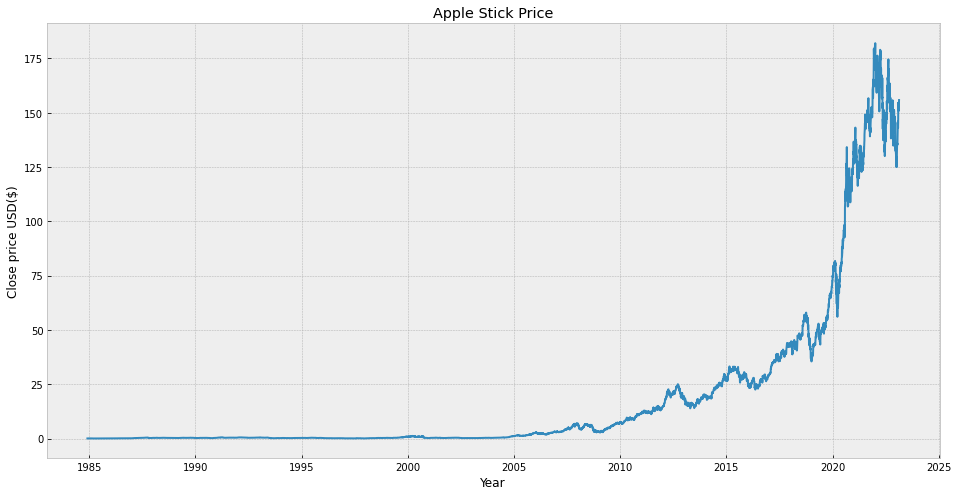

In [58]:
#Visualizing the data
import matplotlib.pyplot as plt
plt.style.use('bmh')
plt.figure(figsize=(16,8))
plt.title('Apple Stick Price')
plt.xlabel('Year')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.show()
#df.plot.line(y="Close", use_index=True)


In [59]:
 #Remving the columns of the dividends and the stock spilts as we dont need them 
 #del df["Dividends"]
 #del df["Stock Splits"]

In [60]:
#Shifting the data and making a new column to show tomorrows price
df["Tomorrow"] = df["Close"].shift(-30) 
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
1984-12-03,0.110491,0.111049,0.108817,0.108817,0.084547,98000000,0.135045
1984-12-04,0.111049,0.113281,0.111049,0.111049,0.086281,120377600,0.125558
1984-12-05,0.116629,0.116629,0.116629,0.116629,0.090616,262908800,0.127790
1984-12-06,0.122210,0.122768,0.122210,0.122210,0.094953,317273600,0.130580
1984-12-07,0.122210,0.126674,0.121094,0.121652,0.094519,494524800,0.134487
...,...,...,...,...,...,...,...
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100,NaN
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,NaN
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600,NaN


In [61]:
#If the opeing price of the day after was higher than the prevois date show it in the target as 1 or 0
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1984-12-03,0.110491,0.111049,0.108817,0.108817,0.084547,98000000,0.135045,1
1984-12-04,0.111049,0.113281,0.111049,0.111049,0.086281,120377600,0.125558,1
1984-12-05,0.116629,0.116629,0.116629,0.116629,0.090616,262908800,0.127790,1
1984-12-06,0.122210,0.122768,0.122210,0.122210,0.094953,317273600,0.130580,1
1984-12-07,0.122210,0.126674,0.121094,0.121652,0.094519,494524800,0.134487,1
...,...,...,...,...,...,...,...,...
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100,NaN,0
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,NaN,0
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600,NaN,0


In [62]:
 #Building the model with the random forest
 from sklearn.ensemble import RandomForestClassifier
 model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
 train = df.iloc[:-100] 
 test = df.iloc[-100:]
 predictors = ["Close", "Volume", "Open", "High", "Low"]
 model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [63]:
 #Taking the precision score
 from sklearn.metrics import precision_score
 preds = model.predict(test[predictors])
 preds
 test[predictors]

,Close,Volume,Open,High,Low
Date,,,,,
2022-09-26,150.770004,93339400,149.660004,153.770004,149.639999
2022-09-27,151.759995,84442700,152.740005,154.720001,149.949997
2022-09-28,149.839996,146691400,147.639999,150.639999,144.839996
2022-09-29,142.479996,128138200,146.100006,146.720001,140.679993
2022-09-30,138.199997,124925300,141.279999,143.100006,138.000000
...,...,...,...,...,...
2023-02-10,151.009995,57409100,149.460007,151.339996,149.220001
2023-02-13,153.850006,62199000,150.949997,154.259995,150.919998
2023-02-14,153.199997,61707600,152.119995,153.770004,150.860001


In [64]:
#Time series
import pandas as pd
preds = pd.Series(preds, index=test.index)
preds

Date
2022-09-26    1
2022-09-27    0
2022-09-28    1
2022-09-29    1
2022-09-30    1
             ..
2023-02-10    1
2023-02-13    1
2023-02-14    1
2023-02-15    0
2023-02-16    0
Length: 100, dtype: int64

In [65]:
#Checking on the precision score
precision_score(test["Target"], preds)

0.3076923076923077

In [66]:
#
combined = pd.concat([test["Target"], preds], axis = 1)

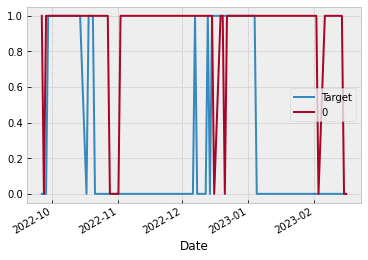

In [67]:
combined.plot()

In [68]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [69]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions =[]

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [70]:
predictions = backtest(df, model, predictors)

In [71]:
predictions["Predictions"].value_counts()

0    3881
1    3249
Name: Predictions, dtype: int64

In [72]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5734072022160664

In [73]:
predictions["Target"].value_counts()/ predictions.shape[0]

1    0.608696
0    0.391304
Name: Target, dtype: float64

In [74]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = df.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  df[ratio_column] = df["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [75]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1984-12-03,0.110491,0.111049,0.108817,0.108817,0.084547,98000000,0.135045,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-12-04,0.111049,0.113281,0.111049,0.111049,0.086281,120377600,0.125558,1,1.010152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-12-05,0.116629,0.116629,0.116629,0.116629,0.090616,262908800,0.127790,1,1.024508,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-12-06,0.122210,0.122768,0.122210,0.122210,0.094953,317273600,0.130580,1,1.023367,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984-12-07,0.122210,0.126674,0.121094,0.121652,0.094519,494524800,0.134487,1,0.997712,2.0,1.048079,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57409100,NaN,0,1.000464,0.0,0.993252,0.0,1.071810,15.0,0.997856,98.0,1.323356,622.0
2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,NaN,0,1.009316,0.0,1.009117,0.0,1.091475,15.0,1.017027,97.0,1.346942,621.0
2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600,NaN,0,0.997883,0.0,1.006769,0.0,1.086298,15.0,1.013255,96.0,1.339965,620.0


In [76]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1988-11-16,0.348214,0.350446,0.337054,0.339286,0.266481,147840000,0.359375,1,0.987014,2.0,0.980014,5.0,0.946255,18.0,0.918463,114.0,1.455832,628.0
1988-11-17,0.339286,0.343750,0.339286,0.341518,0.268234,79542400,0.360491,1,1.003278,2.0,0.992862,5.0,0.953470,18.0,0.924326,114.0,1.463961,628.0
1988-11-18,0.343750,0.343750,0.339286,0.339286,0.266481,57590400,0.375000,1,0.996722,2.0,0.988940,5.0,0.948075,19.0,0.918197,114.0,1.453007,628.0
1988-11-21,0.334821,0.337054,0.323661,0.327009,0.257516,221905600,0.377232,1,0.981574,2.0,0.964450,5.0,0.915149,20.0,0.884961,114.0,1.399203,628.0
1988-11-22,0.325893,0.329241,0.321429,0.322545,0.254000,148187200,0.380580,1,0.993128,2.0,0.965909,5.0,0.904445,21.0,0.872786,114.0,1.378917,628.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400,151.009995,1,0.984418,2.0,0.961242,5.0,0.879205,23.0,0.812498,95.0,1.133951,647.0
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700,153.850006,1,1.013964,2.0,0.997353,5.0,0.905844,23.0,0.836546,96.0,1.165113,647.0
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,76960600,153.199997,1,1.001233,2.0,1.003367,5.0,0.909826,23.0,0.839741,97.0,1.167026,647.0


In [77]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [78]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >=.6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis = 1)
  return combined

In [79]:
predictions = backtest(df, model, new_predictors)

In [80]:
df[new_predictors]

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,
1988-11-16,0.987014,2.0,0.980014,5.0,0.946255,18.0,0.918463,114.0,1.455832,628.0
1988-11-17,1.003278,2.0,0.992862,5.0,0.953470,18.0,0.924326,114.0,1.463961,628.0
1988-11-18,0.996722,2.0,0.988940,5.0,0.948075,19.0,0.918197,114.0,1.453007,628.0
1988-11-21,0.981574,2.0,0.964450,5.0,0.915149,20.0,0.884961,114.0,1.399203,628.0
1988-11-22,0.993128,2.0,0.965909,5.0,0.904445,21.0,0.872786,114.0,1.378917,628.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-28,0.984418,2.0,0.961242,5.0,0.879205,23.0,0.812498,95.0,1.133951,647.0
2022-12-29,1.013964,2.0,0.997353,5.0,0.905844,23.0,0.836546,96.0,1.165113,647.0
2022-12-30,1.001233,2.0,1.003367,5.0,0.909826,23.0,0.839741,97.0,1.167026,647.0


In [81]:
predictions

,Target,Predictions
Date,,
1998-10-08,1,1.0
1998-10-09,1,0.0
1998-10-12,0,0.0
1998-10-13,0,0.0
1998-10-14,0,0.0
...,...,...
2022-12-28,1,1.0
2022-12-29,1,1.0
2022-12-30,1,1.0


In [82]:
predictions["Predictions"].value_counts()

1.0    3668
0.0    2432
Name: Predictions, dtype: int64

In [83]:
precision_score(predictions["Target"], predictions["Predictions"])

0.9495637949836423

In [84]:
import pickle

In [85]:
pickle.dump(model,open('model.pkl','wb'))

In [86]:
model = pickle.load(open('model.pkl','rb'))
preds = model.predict(df[new_predictors])
preds

array([1, 1, 1, ..., 1, 1, 1])

In [87]:
new_predictors

['Close_Ratio_2',
 'Trend_2',
 'Close_Ratio_5',
 'Trend_5',
 'Close_Ratio_60',
 'Trend_60',
 'Close_Ratio_250',
 'Trend_250',
 'Close_Ratio_1000',
 'Trend_1000']

In [88]:
df[new_predictors]

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,
1988-11-16,0.987014,2.0,0.980014,5.0,0.946255,18.0,0.918463,114.0,1.455832,628.0
1988-11-17,1.003278,2.0,0.992862,5.0,0.953470,18.0,0.924326,114.0,1.463961,628.0
1988-11-18,0.996722,2.0,0.988940,5.0,0.948075,19.0,0.918197,114.0,1.453007,628.0
1988-11-21,0.981574,2.0,0.964450,5.0,0.915149,20.0,0.884961,114.0,1.399203,628.0
1988-11-22,0.993128,2.0,0.965909,5.0,0.904445,21.0,0.872786,114.0,1.378917,628.0
...,...,...,...,...,...,...,...,...,...,...
2022-12-28,0.984418,2.0,0.961242,5.0,0.879205,23.0,0.812498,95.0,1.133951,647.0
2022-12-29,1.013964,2.0,0.997353,5.0,0.905844,23.0,0.836546,96.0,1.165113,647.0
2022-12-30,1.001233,2.0,1.003367,5.0,0.909826,23.0,0.839741,97.0,1.167026,647.0
